# Introduce LCR circuit models

### author: Juan M. Acevedo-Valle
### date: Dec/2018

In [1]:
%matplotlib inline
# Import libraries we will be using in this session
import control
from control import ss, tf
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0,6.0)
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

In [2]:
# System parameters
R = 1 #Ohms
C = 0.5 #Farads
L = 1 #Henries

In [3]:
#Transfer function from voltage source to current I(S)/V(S)
num = [1,0]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)


     s
-----------
s^2 + s + 2



Text(0,0.5,'Current [A]')

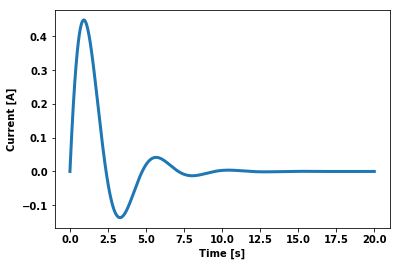

In [4]:
#Step response to step with tf
T = np.linspace(0,20,1000)
T, y_step = control.step_response(tf_lcr,T)
plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')

In [5]:
# State space (x1 = v_c, x2 = dv_c/dt)
A = np.array([[0,1],[-1/(L*C),-R/L]])
B = np.array([[0], [1/(L*C)]])
Cy = np.array([[1,0],[0,C]])
Dy = np.array([[0],[0]])
ss_lcr = ss(A,B,Cy,Dy)
print(ss_lcr)

A = [[ 0.  1.]
 [-2. -1.]]

B = [[0.]
 [2.]]

C = [[1.  0. ]
 [0.  0.5]]

D = [[0]
 [0]]



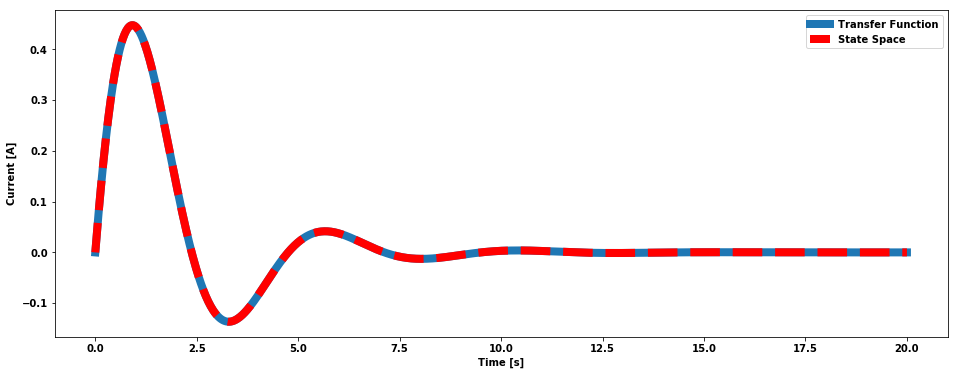

In [6]:
#Time response to step with ss
T, y_step_ss = control.step_response(ss_lcr,T)
matplotlib.rcParams['figure.figsize'] = (16.0,6.0)

plt.plot(T,y_step,lw = 8)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')
plt.plot(T,y_step_ss[1], lw=8, color='r',linestyle='--')
plt.legend(['Transfer Function','State Space'])